In [84]:
import warnings
warnings.filterwarnings("ignore")


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import os

#print(os.getcwd())

In [110]:
dfs = pd.read_excel('churn.xlsx', sheet_name=None)
data=dfs['IBM-Telco-Customer-Churn']

In [111]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
data.shape

(7043, 21)

In [89]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [91]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [112]:
# Converting Total Charges column into numeric
data['TotalCharges']=data['TotalCharges'].convert_objects(convert_numeric=True)

- Using One-hot encoding for all the categorical variables and then comparing the means of all the variables for churners and non-churners

In [113]:
cols=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i in cols:
    print(i,data[i].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [114]:
cleanup_nums = {"Partner":  {"Yes": 1, "No": 0}, "Dependents":  {"Yes": 1, "No": 0}, "PhoneService":  {"Yes": 1, "No": 0},
                "gender":  {"Female": 1, "Male": 0},"PaperlessBilling":  {"Yes": 1, "No": 0}}

data1=data.replace(cleanup_nums)
data1.head()    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [115]:
MultipleLines_dummy = pd.get_dummies(data1['MultipleLines'],prefix='MultipleLines')
Internet_dummy = pd.get_dummies(data1['InternetService'],prefix='InternetService')
OnlineSecurity_dummy = pd.get_dummies(data1['OnlineSecurity'],prefix='OnlineSecurity')
OnlineBackup_dummy = pd.get_dummies(data1['OnlineBackup'],prefix='OnlineBackup')
DeviceProtection_dummy = pd.get_dummies(data1['DeviceProtection'],prefix='DeviceProtection')
TechSupport_dummy = pd.get_dummies(data1['TechSupport'],prefix='TechSupport')
StreamingTV = pd.get_dummies(data1['StreamingTV'],prefix='StreamingTV')
StreamingMovies_dummy = pd.get_dummies(data1['StreamingMovies'],prefix='StreamingMovies')
Contract_dummy = pd.get_dummies(data1['Contract'],prefix='Contract')
PaymentMethod_dummy = pd.get_dummies(data1['PaymentMethod'],prefix='PaymentMethod')

data1 = pd.concat([data1, MultipleLines_dummy,Internet_dummy,OnlineSecurity_dummy,OnlineBackup_dummy, DeviceProtection_dummy
                  ,TechSupport_dummy,StreamingTV, StreamingMovies_dummy, Contract_dummy, PaymentMethod_dummy ], axis = 1)
data1.drop(columns=['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], axis = 1, inplace=True)

In [116]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


- We are done with one hot encoding and feature mapping
- Let's see if there are any null values in the dataset

In [117]:
data1.isnull().any()

customerID                                 False
gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                                True
Churn                                      False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No     

In [119]:
np.sum(data1['TotalCharges'].isnull())


11

In [120]:
#Only 11 null records are there, dropping those rows
data1.dropna(inplace=True)

In [121]:
data1.shape

(7032, 42)

- Checking for correlation among features

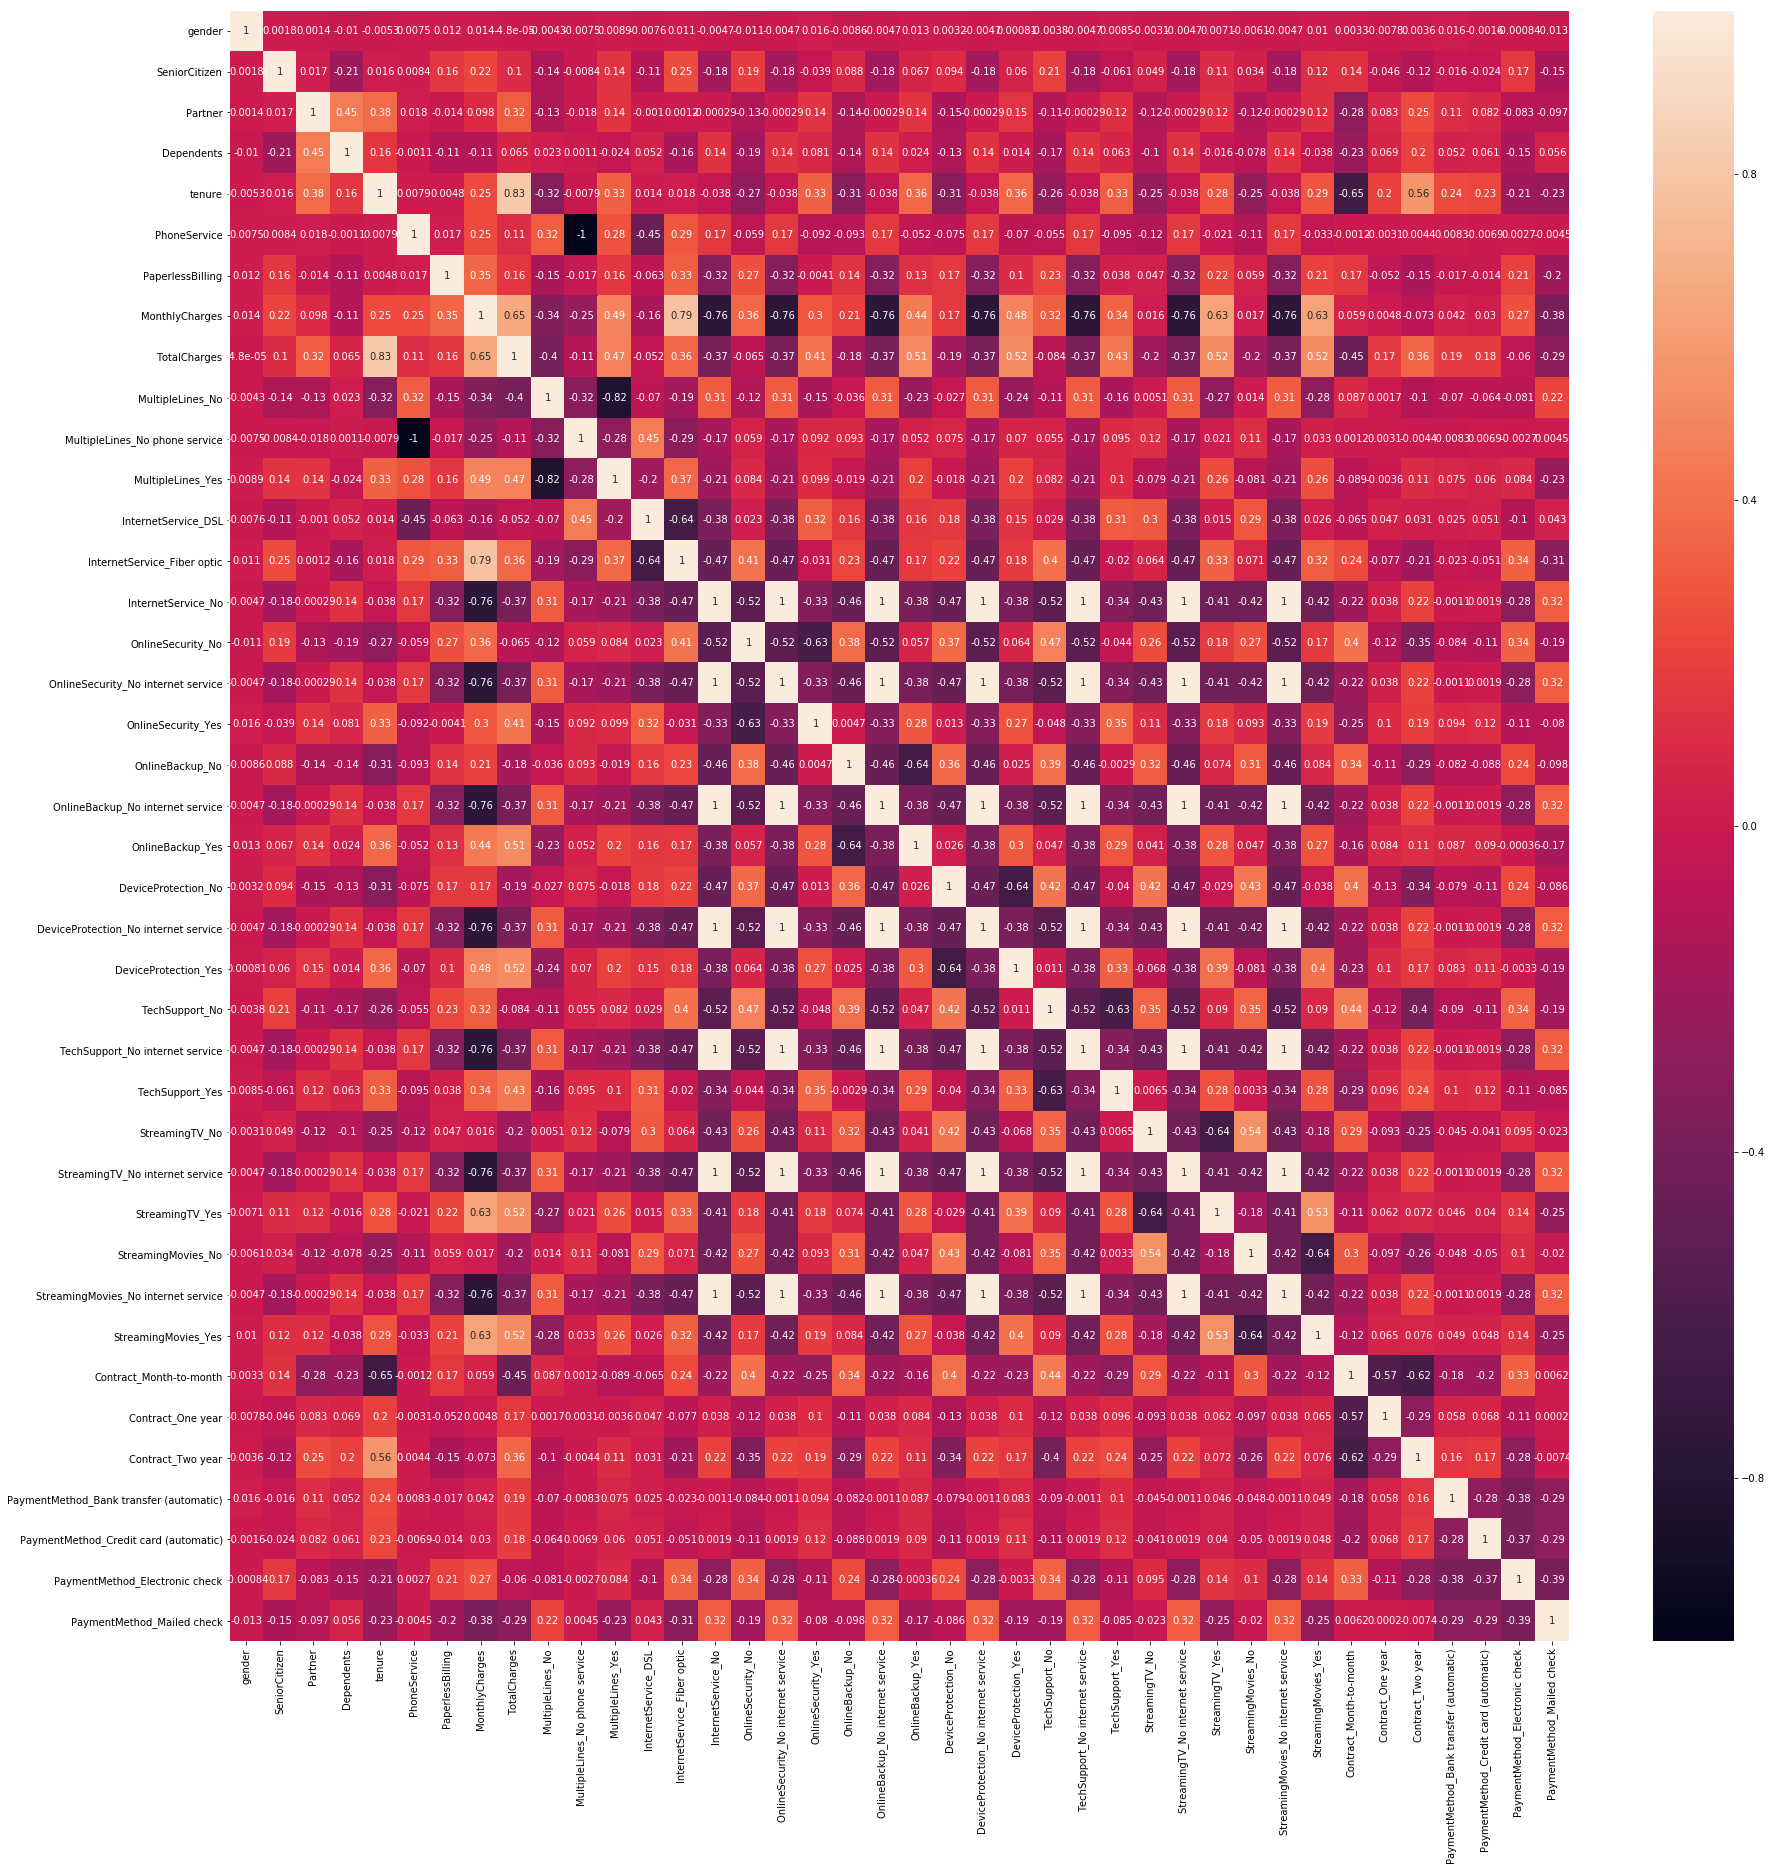

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30)) 
sns.heatmap(data1.corr(), annot=True) 

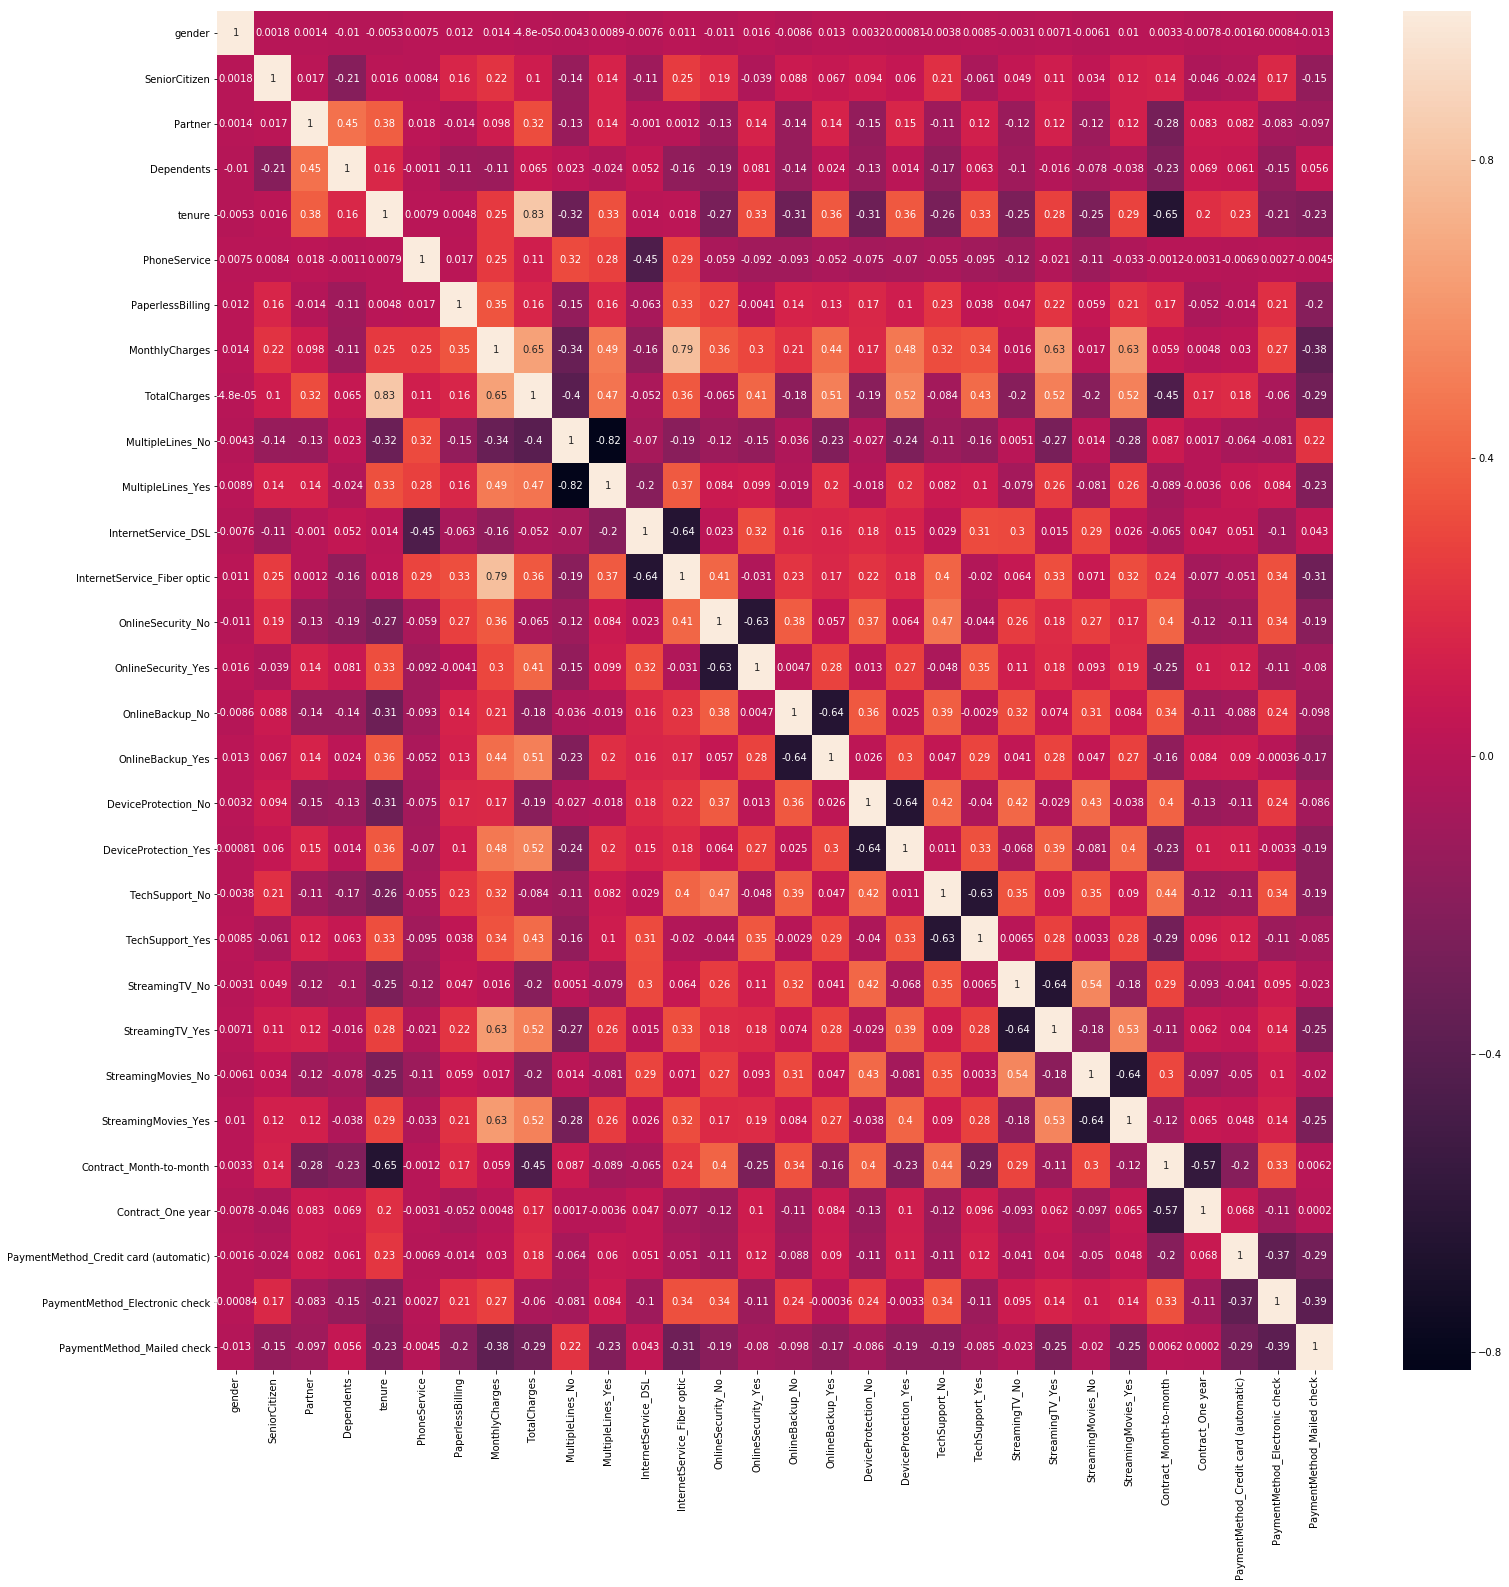

In [130]:
#There are very strong correlation here, we need to get rid of the extra dummies which are leading to high correlations, 
# which will in turn lead to multicollinearity, we always make n-1 dummy varibles , where n is the number of categories
# in a feature

data2=data1.drop(columns=['MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service',
                         'OnlineBackup_No internet service','DeviceProtection_No internet service',
                          'TechSupport_No internet service','StreamingTV_No internet service',
                          'StreamingMovies_No internet service','Contract_Two year',
                          'PaymentMethod_Bank transfer (automatic)'],axis=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25)) 
sns.heatmap(data2.corr(), annot=True) 

- No high correlation now

In [132]:
#Standardizing the data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#Dropping customerId column
data3=data2.drop('customerID',axis=1)

# Mapping churn to 0 and 1
data3['Churn']=data3['Churn'].map({'Yes':1,'No':0})

# Applying min max scaling
data4=scaler.fit_transform(data3)

In [135]:
# To put column names to data4, we are taking them from data2, but data2 has an extra column, dropping that
data_for_columns=data2.drop('customerID',axis=1)

In [136]:
#Data4 is no longer a Dataframe after scaling, converting it into a dataframe and adding column names back to it
data5=pd.DataFrame(data4, columns=data_for_columns.columns)

In [137]:
data5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [138]:
diff=((data5[data5['Churn']==1].mean()-data5[data5['Churn']==0].mean())/data5[data5['Churn']==1].mean())*100
print('Percentage difference between the mean of X variables of churners and non churners \n\n{}'
      .format(abs(diff).sort_values(ascending=False)))

Percentage difference between the mean of X variables of churners and non churners 

Contract_One year                        184.801495
tenure                                   115.853243
OnlineSecurity_Yes                       111.063729
TechSupport_Yes                          102.018706
PaymentMethod_Credit card (automatic)    101.127803
Churn                                    100.000000
Dependents                                96.878509
TotalCharges                              67.650409
PaymentMethod_Electronic check            56.262699
InternetService_DSL                       54.342424
PaymentMethod_Mailed check                52.321589
Contract_Month-to-month                   51.441848
InternetService_Fiber optic               49.789059
OnlineSecurity_No                         49.553071
SeniorCitizen                             49.350583
TechSupport_No                            49.280107
Partner                                   47.396836
OnlineBackup_No                

### Because indicator variables have less predicting power, we are going to keep all the numeric columns irrespective of their percentage differences, we have 3 such columns
- Tenure
- Total Charges
- Monthly Charges

### Apart from these, we are keeping 7 categorical variables which have the highest percentage differences in mean among churners and non-churners, which are:
- Contract
- OnlineSecurity
- TechSupport
- Payment Method
- Dependents
- InternetService
- Senior Citizen

In [139]:
print('Number of customer who churned within the last month {}'.format(data6[data6['Churn']==1].shape[0]))
print('Number of customer who did not churn within the last month {}'.format(data6[data6['Churn']==0].shape[0]))      

Number of customer who churned within the last month 1869
Number of customer who did not churn within the last month 5163


In [143]:
# It means 5163 0's are there in the dataset that we have finalized
print('Accuracy with naive prediction {:.2f}%'.format(5163*100/(5163+1869)))

Accuracy with naive prediction 73.42%


In [145]:
print('Percentage of Churners in the data {}'.format(1869*100/5163))

Percentage of Churners in the data 36.19988378849506


##### Ratio of churners to Non-Churners is  around 36%  i.e. which is fine and so we do not need any oversampling as of now

- We are done with the Data preprocessing Part
- Next steps are perfomed in SAS. We did these steps in python just to get top 10 features using difference of means

### Using Machine Learning to check if we get same feature importance as we got using difference of means

In [147]:
X=data3.drop(columns=['Churn'],axis=1)
y=data3['Churn']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)



X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [148]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print('Train score using Logistic Regression {}'.format(lr.score(X_train,y_train)))
print('Test score using Logistic Regression {}'.format(lr.score(X_test,y_test)))

0.8029958285930983
0.8094425483503982


In [152]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(random_state=0)

parameters={'max_depth':[1, 3, 5, 7,9],'max_features':[5, 7, 9,14,17],'n_estimators':[100, 200, 500,800,1000,1200]}
grid=GridSearchCV(estimator=forest,param_grid=parameters,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

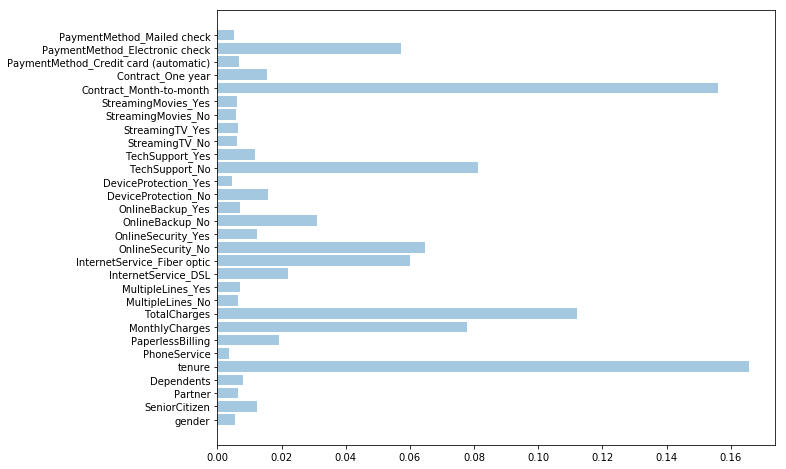

In [153]:
import matplotlib.pyplot as plt
import numpy as np

forest = RandomForestClassifier(max_depth=7,max_features=5,n_estimators=500, random_state=0)
forest.fit(X_train,y_train)

plt.figure(figsize=(10,8))
y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns.values
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

In [155]:
print('Train Score {:.2f}'.format(forest.score(X_train,y_train)))
print('Test Score {:.2f}'.format(forest.score(X_test,y_test)))

Train Score 0.83
Test Score 0.81


In [156]:
x1=pd.DataFrame(features,columns=['Feature'])
x2=pd.DataFrame(y_list,columns=['Importance'])

a = pd.concat([x1,x2],axis=1)
a.sort_values(by='Importance',ascending=False)

,Feature,Importance
4,tenure,0.165585
25,Contract_Month-to-month,0.155869
8,TotalCharges,0.112173
19,TechSupport_No,0.081135
7,MonthlyCharges,0.077764
13,OnlineSecurity_No,0.064734
12,InternetService_Fiber optic,0.059978
28,PaymentMethod_Electronic check,0.057364
15,OnlineBackup_No,0.031082
11,InternetService_DSL,0.022047


#### Top 10 features by Random Forest
- tenure
- Contract
- Total Charges
- Tech Support
- Monthly Charges
- Online Security
- Internet Service
- Payment Method
- Online Backup
- Paperless Billing

#### 8 out of the 10 features are same as what we got by using percentage mean difference trick

####  Rest of the analysis is done in SAS